In [1]:
!git clone https://github.com/AlbertoRomanRamosRodriguez/keras_example.git

Cloning into 'keras_example'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 35 (delta 10), reused 33 (delta 8), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [2]:
from keras_example.nn.conv.lenet import LeNet

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("[INFO] accessing MNIST...")
((trainData, trainLabels),(testData, testLabels))=mnist.load_data()

if K.image_data_format() == 'channels_first':
  trainData = trainData.reshape((trainData.shape[0],1,28,28))
  testData = testData.reshape((testData.shape[0],1,28,28))
else:
  trainData = trainData.reshape((trainData.shape[0],28,28,1))
  testData = testData.reshape((testData.shape[0],28,28,1))

trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

le = LabelBinarizer()
trainLabels = le.fit_transform(trainLabels)
testLabels = le.transform(testLabels)

[INFO] accessing MNIST...
11490434/11490434 [==============================] - 0s 0us/step


In [4]:
def evaluate_model(model_name:str):

  model = load_model(f'./models/{model_name}')
  print(f"[INFO] evaluating {model_name}...")
  predictions = model.predict(testData, batch_size=32)
  print(classification_report(testLabels.argmax(axis=1), 
    predictions.argmax(axis=1)))

  plt.style.use('ggplot')
  plt.figure()

  plt.plot(np.arange(0,EPOCHS), H.history['loss'], label='train_loss')
  plt.plot(np.arange(0,EPOCHS), H.history['val_loss'], label='val_loss')
  plt.plot(np.arange(0,EPOCHS), H.history['accuracy'], label='train_acc')
  plt.plot(np.arange(0,EPOCHS), H.history['val_accuracy'], label='val_acc')
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.xlabel("Loss/Accuracy")
  plt.legend()
  plt.show()

In [5]:
print("[INFO] compiling model...")
opt = SGD(lr=0.05)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])
EPOCHS = 20

# train the network
print("[INFO] training network...")
H = model.fit(trainData, trainLabels,
validation_data=(testData, testLabels), batch_size=128,
epochs=EPOCHS, verbose=1)

[INFO] compiling model...


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


[INFO] training network...
Epoch 1/20
469/469 [==============================] - 14s 7ms/step - loss: 0.2978 - accuracy: 0.9114 - val_loss: 0.1182 - val_accuracy: 0.9633
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1053 - accuracy: 0.9673 - val_loss: 0.0850 - val_accuracy: 0.9743
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0742 - accuracy: 0.9772 - val_loss: 0.0698 - val_accuracy: 0.9788
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0575 - accuracy: 0.9822 - val_loss: 0.0686 - val_accuracy: 0.9780
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0590 - val_accuracy: 0.9811
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0509 - val_accuracy: 0.9830
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.0556 -

In [6]:
from datetime import datetime

date = datetime.today().strftime("%m_%d_%Y_%H_%M_%S")

model.save(f"./models/model_mnist_lenet_{date}.hdf5")

[INFO] evaluating model_mnist_lenet_01_10_2023_20_50_12.hdf5...
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



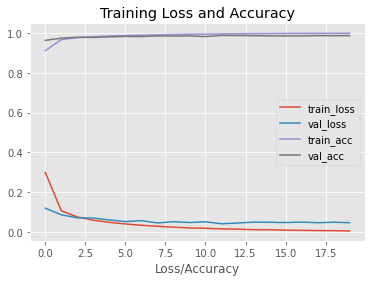

In [7]:
for m in os.listdir('./models/'):
    evaluate_model(m)